In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import time
import glob
from astropy.visualization import PercentileInterval, ImageNormalize, AsinhStretch
from astropy.io import fits


/home/msiudek/myspace/software/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-18 08:16:05.910048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739866566.007649  224605 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739866566.035701  224605 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 08:16:06.278850: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-cr

In [2]:
# Visualization function for embeddings
def visualize_embeddings_side_by_side(zss_2d_1, zss_2d_2, zss_2d_3, property_array_1, property_array_2, property_array_3,
                                      property_name, cmap="RdYlBu_r", vmin=None, vmax=None, output_path=None):

    gridsize = 100

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    fig = plt.figure(figsize=(22, 10)) 
    plt.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.02, hspace=0)

    # Helper function to add spines
    def add_spines(ax):
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1.5)  # You can adjust the line width here
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Plot 1: VIS
    ax1 = fig.add_subplot(1, 3, 1)  
    scatter1 = ax1.hexbin(zss_2d_1[:, 0], zss_2d_1[:, 1], C=property_array_1, gridsize=gridsize, cmap=cmap, bins=None, vmin=vmin, vmax=vmax)
    add_spines(ax1)  # Add spines to the plot
    ax1.text(0.8, 0.8, r'$\rm VIS$', transform=ax1.transAxes, fontsize=25, color='black')

    # Plot 2: VIS+NISP
    ax2 = fig.add_subplot(1, 3, 2)
    scatter2 = ax2.hexbin(zss_2d_2[:, 0], zss_2d_2[:, 1], C=property_array_2, gridsize=gridsize, cmap=cmap, bins=None, vmin=vmin, vmax=vmax)
    add_spines(ax2)  # Add spines to the plot
    ax2.text(0.6, 0.8, r'$\rm VIS+NISP$', transform=ax2.transAxes, fontsize=25, color='black')

    # Plot 3: SED+VIS+NISP
    ax3 = fig.add_subplot(1, 3, 3)
    scatter3 = ax3.hexbin(zss_2d_3[:, 0], zss_2d_3[:, 1], C=property_array_3, gridsize=gridsize, cmap=cmap, bins=None, vmin=vmin, vmax=vmax)
    add_spines(ax3)  # Add spines to the plot
    ax3.text(0.5, 0.8, r'$\rm VIS+NISP+SED$', transform=ax3.transAxes, fontsize=23, color='black')

    # Shared colorbar
    cbar = fig.colorbar(scatter2, ax=[ax1, ax2, ax3], orientation='vertical', fraction=0.02, pad=0.02)
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(f"{property_name}", fontsize=25)

    # Save or show
    if output_path:
        plt.savefig(output_path)
    else:
        plt.show()
    plt.close()


In [3]:
# Load the FITS catalog
def load_data(file):

    with fits.open(file) as hdul:
        catalog = hdul[1].data
    # Extract catalog properties
    object_ids = catalog['object_id']
    umap1 = catalog['UMAP1']
    umap2 = catalog['UMAP2']
    det_flag = catalog['det_quality_flag'] 
    zss = np.column_stack((umap1, umap2))
    return zss, det_flag

In [4]:
catalog_vis = "../../VIS/UMAP_VIS_train.fits"  
catalog_vis_nisp = "../../VIS_NISP/UMAP_VIS_NISP_train.fits"  
catalog_vis_nisp_sed = "../../VIS_NISP_SED/UMAP_VIS_NISP_SED_train.fits"  

In [5]:
zss_vis, properties_vis = load_data(catalog_vis)
zss_vis_nisp, properties_vis_nisp = load_data(catalog_vis_nisp)
zss_vis_nisp_sed, properties_vis_nisp_sed = load_data(catalog_vis_nisp_sed)


In [6]:
print("Embeddings shape:", zss_vis.shape)
print("Embeddings shape:", zss_vis_nisp.shape)
print("Embeddings shape:", zss_vis_nisp_sed.shape)

Embeddings shape: (265407, 2)
Embeddings shape: (264800, 2)
Embeddings shape: (264800, 2)


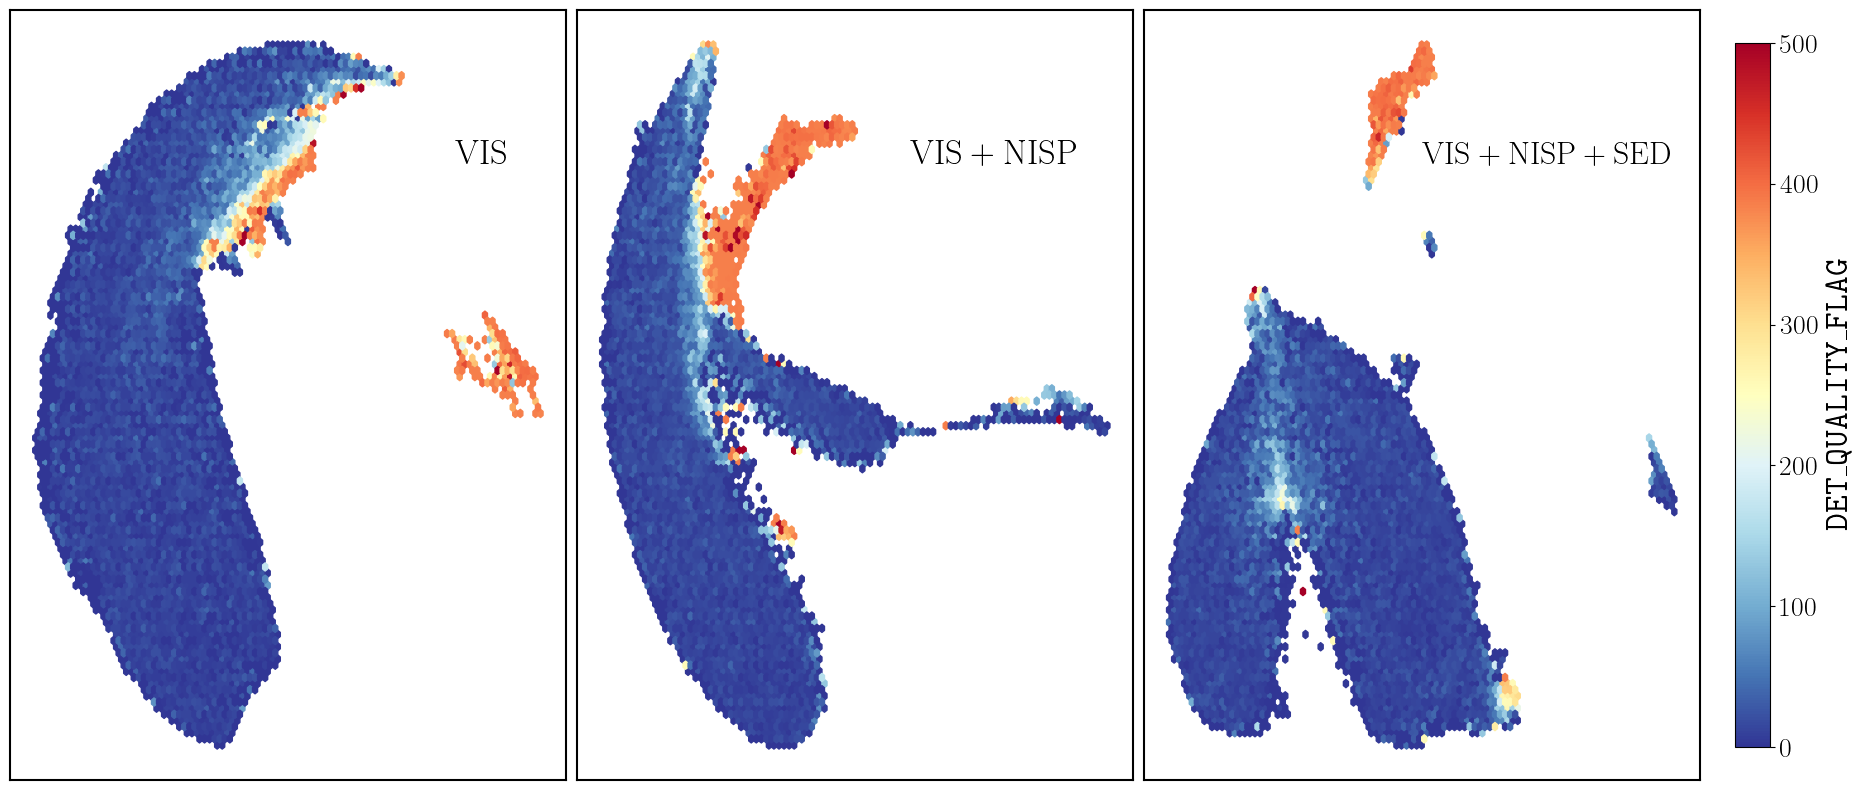

In [9]:
# Visualize properties for Quality Flag
visualize_embeddings_side_by_side(zss_vis, zss_vis_nisp, zss_vis_nisp_sed, properties_vis, \
                                  properties_vis_nisp, properties_vis_nisp_sed, 
                                   r'$\tt DET\_QUALITY\_FLAG$', vmax=500)


In [11]:
# Visualize properties for Quality Flag
visualize_embeddings_side_by_side(zss_vis, zss_vis_nisp, zss_vis_nisp_sed, properties_vis, \
                                  properties_vis_nisp, properties_vis_nisp_sed, 
                                   r'$\tt DET\_QUALITY\_FLAG$', vmax=500, output_path="det_quality_flag_emb.png")
